## Importações

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import entropy

from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')

## Jogando a moeda

In [2]:
def moeda(ls_prob,tamanho) -> np.array:
    
    """
    Joga uma moeda tamanho vezes respeitando a lista de probabilidades entregue
    
    Parameters:
    ---
        - ls_prob: list
            lista com a distribuição de probabilidade desejada (cara e coroa).
        - tamanho: int
            o tamanho do array de saída (quantas vezes você vai jogar a moeda).
        
    Returns:
    ---
        - jogadas: np.array
            array com integers representando cara (0) e coroa (1) de tamanho (tamanho).
    """
    
    jogadas = np.random.choice([0,1],size=tamanho,p=ls_prob)
    
    return jogadas

In [10]:
data = moeda([0.9,0.1],1000)

In [11]:
## medir a probabilidade ao longo das jogadas

## iniciando duas listas (cara e coroa)
ls_0 = []
ls_1 = []

for i in range(1,1001):
    iter_data = list(Counter(data[:i]).values())
    prob_0 = iter_data[0] / i
    ls_0.append(prob_0)
    try:
        prob_1 = iter_data[1] / i
        ls_1.append(prob_1)
    except:
        ls_1.append(0)

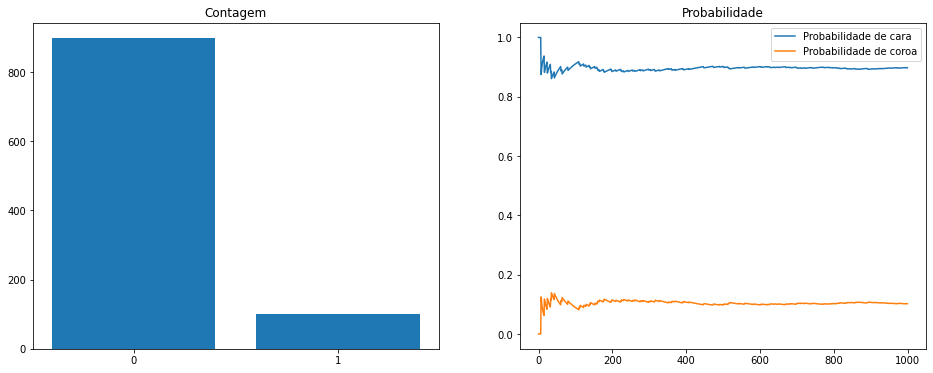

In [12]:
## plotando o histórico de probabilidades e jogadas

f, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].bar([0,1],list(Counter(data).values()))
ax[0].set_xticks([0,1])
ax[0].set_title('Contagem')
ax[1].plot(ls_0,label='Probabilidade de cara')
ax[1].plot(ls_1,label='Probabilidade de coroa')
ax[1].set_title('Probabilidade')
plt.legend()
plt.show()

In [13]:
ls_0[:5],ls_1[:5]

([1.0, 1.0, 1.0, 1.0, 1.0], [0, 0, 0, 0, 0])

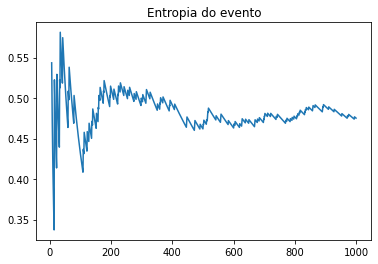

In [14]:
f, ax = plt.subplots()

ls_entropy = []

for i in range(len(ls_0)):
        ls_entropy.append(-ls_0[i]*np.log2(ls_0[i])-ls_1[i]*np.log2(ls_1[i]))
    
ax.plot(ls_entropy)
ax.set_title('Entropia do evento')
plt.show()

Text(0.5, 1.0, 'Entropias possíveis')

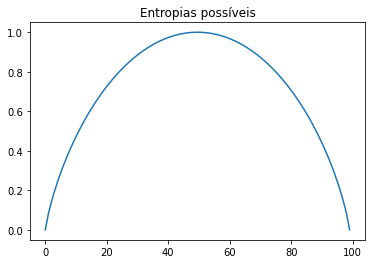

In [9]:
f, ax = plt.subplots()

ax.plot([entropy([x,1-x],base=2) for x in np.linspace(0,1,100)])
ax.set_title('Entropias possíveis')